In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.metrics import silhouette_samples
import numpy as np
from scipy.spatial import distance
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns


In [4]:


# Get the file name from the uploaded files
file_name = "/Users/abhinavchaudhary/Downloads/IMB881.xlsx"
# Read the XLSX file into a DataFrame

OrderSample = pd.read_excel(file_name, sheet_name=1)

# Read DataOrder from sheet 2
DataOrder = pd.read_excel(file_name, sheet_name=2)

# Read DataOnSample from sheet 3
DataOnSample = pd.read_excel(file_name, sheet_name=3)

# Read DataForRecommendation from sheet 4
DataForRecommendation = pd.read_excel(file_name, sheet_name=4)

# Read DataForClustering from sheet 5
DataForClustering = pd.read_excel(file_name, sheet_name=5)

# Read AssociationRules from sheet 6
AssociationRules = pd.read_excel(file_name, sheet_name=6)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

# Load the OrderSample DataFrame (assuming it's already loaded)
# If not, you can use the upload steps mentioned earlier
# OrderSample = pd.read_excel(file_name, sheet_name=2)

# Creating a backup for OrderSample Dataset
OrderSample2 = OrderSample.copy()

# Converting values of categorical columns with character into factor format
categorical_columns = ['OrderType', 'OrderCategory', 'CustomerCode', 'CountryName', 'UnitName',
                        'ITEM_NAME', 'QualityName', 'DesignName', 'ColorName', 'ShapeName']

OrderSample[categorical_columns] = OrderSample[categorical_columns].astype('category')

# Verify if 'Custorderdate' column is present
if 'Custorderdate' in OrderSample.columns:
    # Convert 'Custorderdate' to datetime format
    OrderSample['Custorderdate'] = pd.to_datetime(OrderSample['Custorderdate'])


OrderSample['year'] = pd.to_datetime(OrderSample['Custorderdate']).dt.year


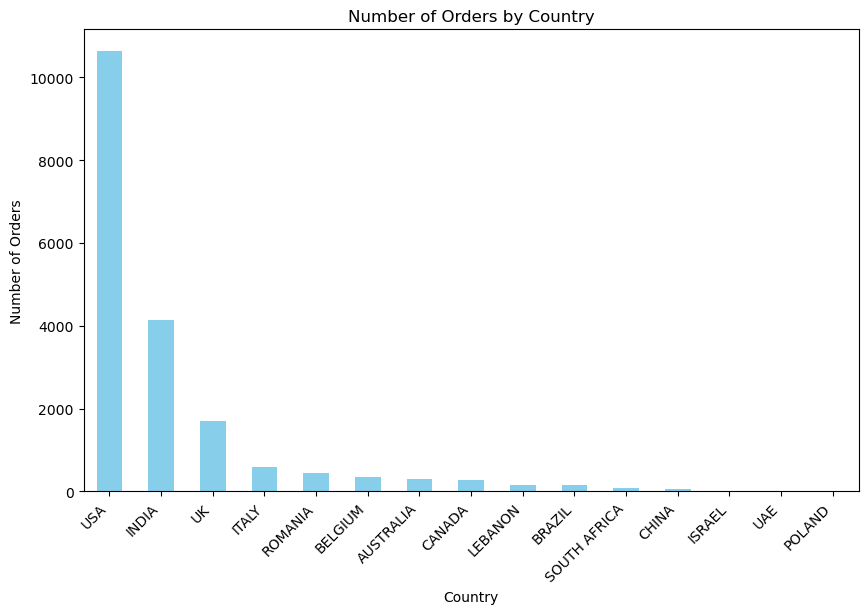

In [6]:
# Additional Exploratory Data Analysis (EDA)
# Summary Statistics
summary_stats = OrderSample.describe()
country_orders = OrderSample['CountryName'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
country_orders.plot(kind='bar', color='skyblue')
plt.title('Number of Orders by Country')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.show()


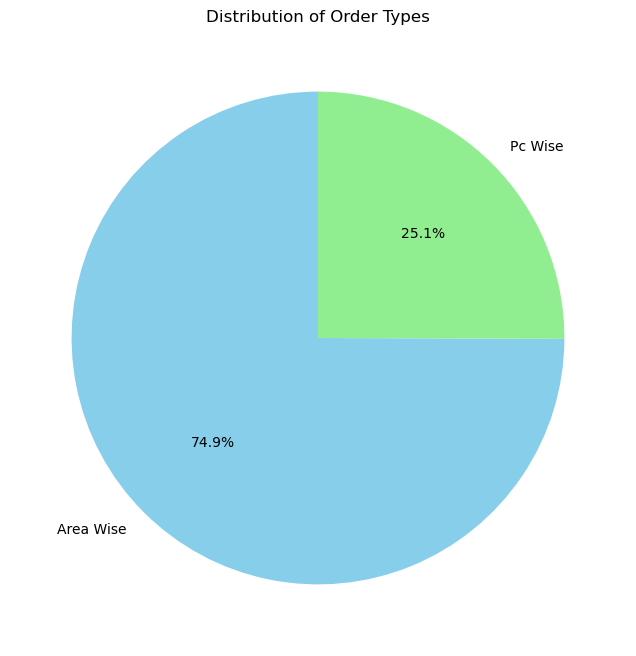

In [7]:

# If not, replace 'OrderSample' with the actual DataFrame name
# Assuming the column name for orders is 'OrderID'
order_types = OrderSample['OrderType'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
order_types.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Order Types')
plt.ylabel('')  # Remove y-axis label for a cleaner look
plt.show()

In [8]:

# Display the total number of missing values in each column
missing_values = OrderSample.isnull().sum()

# Display the percentage of missing values in each column
missing_percentage = (OrderSample.isnull().mean() * 100).round(2)

# Create a DataFrame to display the results
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Print the missing information
print("Missing Values in the OrderSample Dataset:")
print(missing_info)

Missing Values in the OrderSample Dataset:
                 Missing Values  Percentage
OrderType                     0        0.00
OrderCategory                 0        0.00
CustomerCode                  0        0.00
CountryName                   0        0.00
CustomerOrderNo               9        0.05
Custorderdate                 0        0.00
UnitName                      0        0.00
QtyRequired                   0        0.00
TotalArea                     0        0.00
Amount                        0        0.00
ITEM_NAME                     0        0.00
QualityName                   0        0.00
DesignName                    0        0.00
ColorName                     0        0.00
ShapeName                     0        0.00
AreaFt                        0        0.00
year                          0        0.00


In [23]:

# Replace missing values with 0 in the entire dataset
OrderSample_filled = OrderSample.fillna(0)

# Display the total number of missing values in each column after filling
missing_values_after_fill = OrderSample_filled.isnull().sum()

# Display the percentage of missing values in each column after filling
missing_percentage_after_fill = (OrderSample_filled.isnull().mean() * 100).round(2)

# Create a DataFrame to display the results after filling
missing_info_after_fill = pd.DataFrame({
    'Missing Values': missing_values_after_fill,
    'Percentage': missing_percentage_after_fill
})

# Print the missing information after filling
print("Missing Values in the OrderSample Dataset after Filling with 0:")
print(missing_info_after_fill)

Missing Values in the OrderSample Dataset after Filling with 0:
                 Missing Values  Percentage
OrderType                     0         0.0
OrderCategory                 0         0.0
CustomerCode                  0         0.0
CountryName                   0         0.0
CustomerOrderNo               0         0.0
Custorderdate                 0         0.0
UnitName                      0         0.0
QtyRequired                   0         0.0
TotalArea                     0         0.0
Amount                        0         0.0
ITEM_NAME                     0         0.0
QualityName                   0         0.0
DesignName                    0         0.0
ColorName                     0         0.0
ShapeName                     0         0.0
AreaFt                        0         0.0


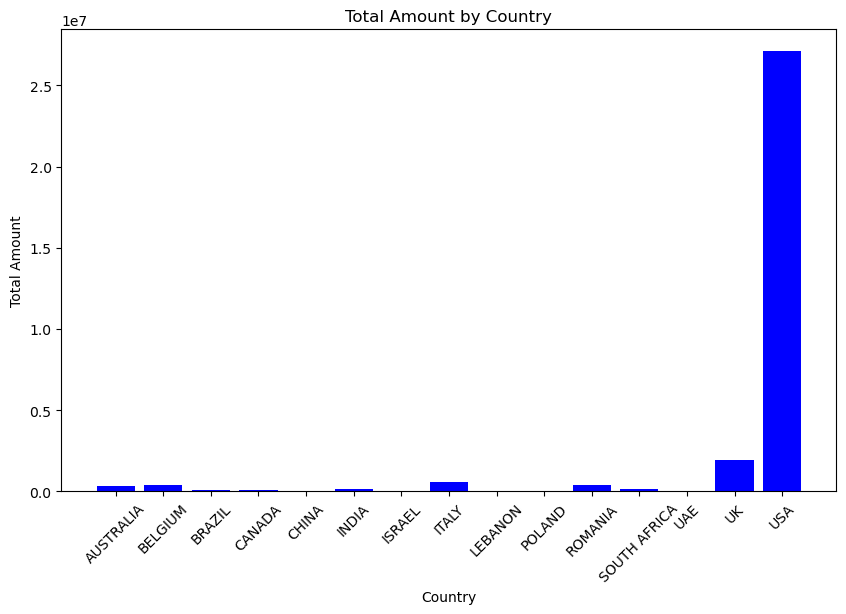

In [9]:
# Group the data by 'CountryName' and sum the 'Amount' for each country
total_amount_by_country = OrderSample.groupby('CountryName')['Amount'].sum().reset_index()

# Plot the total amount for each country using a bar graph
plt.figure(figsize=(10, 6))
plt.bar(total_amount_by_country['CountryName'], total_amount_by_country['Amount'], color='blue')
plt.xlabel('Country')
plt.ylabel('Total Amount')
plt.title('Total Amount by Country')
plt.xticks(rotation=45)
plt.show()

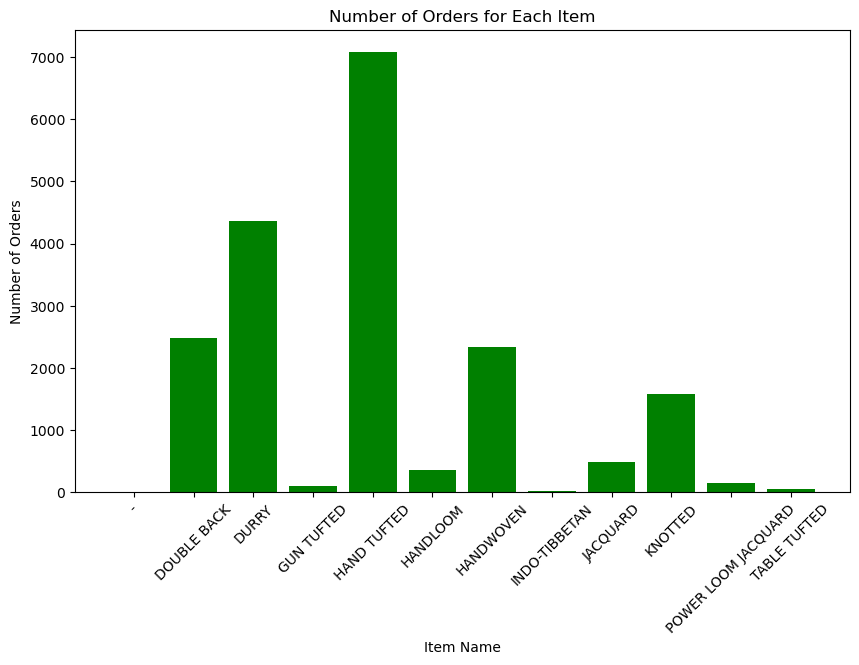

The most ordered item is 'HAND TUFTED' with 7086 orders.


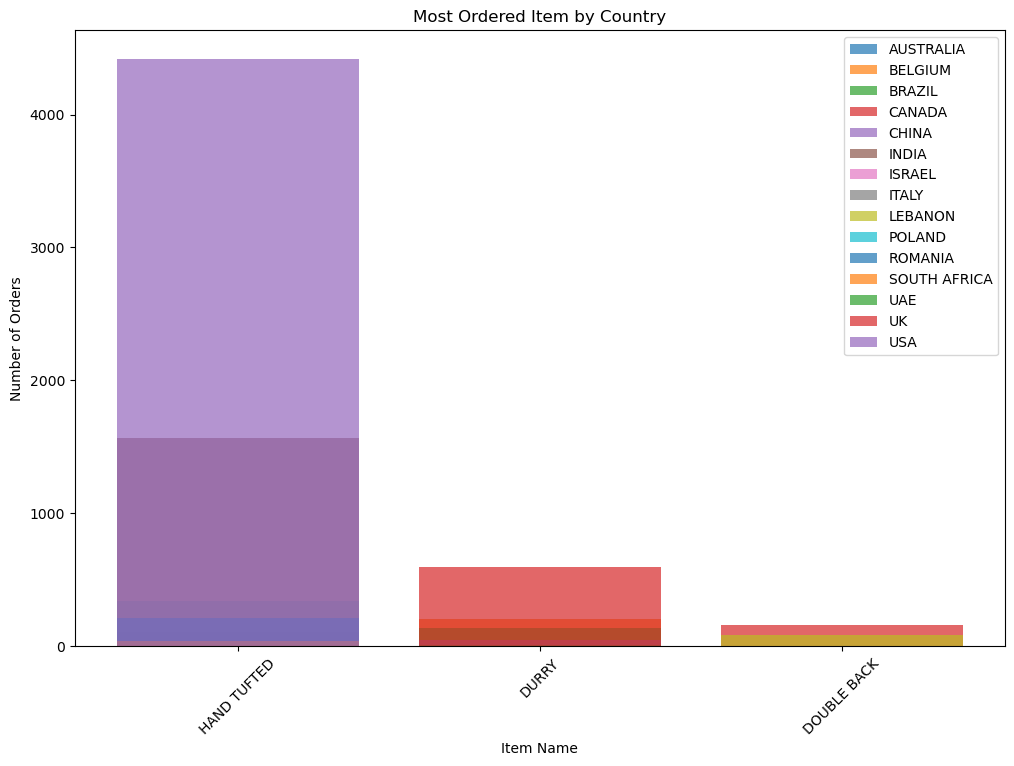

In [10]:
# Group the data by 'ITEM_NAME' and count the number of orders for each item
item_order_counts = OrderSample.groupby('ITEM_NAME')['CustomerOrderNo'].count().reset_index()

# Get the item with the maximum orders
most_ordered_item = item_order_counts.loc[item_order_counts['CustomerOrderNo'].idxmax()]

# Plot the graph for the most ordered items
plt.figure(figsize=(10, 6))
plt.bar(item_order_counts['ITEM_NAME'], item_order_counts['CustomerOrderNo'], color='green')
plt.xlabel('Item Name')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for Each Item')
plt.xticks(rotation=45)
plt.show()

print(f"The most ordered item is '{most_ordered_item['ITEM_NAME']}' with {most_ordered_item['CustomerOrderNo']} orders.")

# Group the data by 'CountryName' and find the most ordered item for each country
most_ordered_item_by_country = OrderSample.groupby(['CountryName', 'ITEM_NAME'])['CustomerOrderNo'].count().reset_index()
most_ordered_item_by_country = most_ordered_item_by_country.loc[most_ordered_item_by_country.groupby('CountryName')['CustomerOrderNo'].idxmax()]

# Plot the graph for the most ordered items by country
plt.figure(figsize=(12, 8))
for country in most_ordered_item_by_country['CountryName'].unique():
    country_data = most_ordered_item_by_country[most_ordered_item_by_country['CountryName'] == country]
    plt.bar(country_data['ITEM_NAME'], country_data['CustomerOrderNo'], label=country, alpha=0.7)

plt.xlabel('Item Name')
plt.ylabel('Number of Orders')
plt.title('Most Ordered Item by Country')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [20]:
DataOnSample.head()


,CustomerCode,CountryName,USA,UK,Italy,Belgium,Romania,Australia,India,QtyRequired,...,Knotted,Jacquard,Handloom,Other,ShapeName,REC,Round,Square,AreaFt,Order Conversion
0,CC,INDIA,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
1,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
2,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,0,0,0,0,REC,1,0,0,80.0,1
3,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
4,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1


In [29]:
from sklearn.impute import SimpleImputer

# Assuming 'Order Conversion' is the target variable, replace it with the actual column name if different
target_variable = 'Order Conversion'  # Corrected: 'Order Conversion' should be a string

# Extract features and target variable from the DataOnSample DataFrame
features = DataOnSample.drop(target_variable, axis=1)
target = DataOnSample[target_variable]

# Identify categorical columns
categorical_columns = features.select_dtypes(include=['object']).columns

# Use label encoding for categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    features[column] = label_encoder.fit_transform(features[column])

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Recreate a DataFrame with imputed values
features_imputed = pd.DataFrame(features_imputed, columns=features.columns)

# Calculate mutual information scores
mutual_info_scores = mutual_info_classif(features_imputed, target, random_state=42)

# Create a DataFrame to store feature names and their corresponding mutual information scores
mutual_info_df = pd.DataFrame({'Feature': features.columns, 'Mutual_Info_Score': mutual_info_scores})

# Sort the DataFrame by mutual information score in descending order
mutual_info_df = mutual_info_df.sort_values(by='Mutual_Info_Score', ascending=False)

# Display the DataFrame
print(mutual_info_df)


         Feature  Mutual_Info_Score
23        AreaFt           0.092277
0   CustomerCode           0.064771
1    CountryName           0.052024
10     ITEM_NAME           0.044491
5        Belgium           0.034107
18         Other           0.028816
8          India           0.025570
15       Knotted           0.019201
9    QtyRequired           0.015921
12         Durry           0.008501
13   Double Back           0.005314
21         Round           0.004647
6        Romania           0.004456
2            USA           0.004016
17      Handloom           0.003554
16      Jacquard           0.002897
4          Italy           0.000686
11   Hand Tufted           0.000000
7      Australia           0.000000
3             UK           0.000000
14    Hand Woven           0.000000
19     ShapeName           0.000000
20           REC           0.000000
22        Square           0.000000


In [31]:

# Selecting specific columns from DataOnSample DataFrame
new_features = DataOnSample[["AreaFt", "CustomerCode", "CountryName", "ITEM_NAME", "Other", "Knotted", "QtyRequired", "Durry", "Double Back", "Round"]]


In [56]:
from sklearn.preprocessing import LabelEncoder

l1 = LabelEncoder()
DataOnSample["CountryName"] = l1.fit_transform(DataOnSample["CountryName"])
DataOnSample["ITEM_NAME"] = l1.fit_transform(DataOnSample["ITEM_NAME"])
DataOnSample.head()

,CustomerCode,CountryName,USA,UK,Italy,Belgium,Romania,Australia,India,QtyRequired,...,Knotted,Jacquard,Handloom,Other,ShapeName,REC,Round,Square,AreaFt,Order Conversion
0,CC,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
1,M-1,13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
2,M-1,13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,0,0,0,0,REC,1,0,0,80.0,1
3,M-1,13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
4,M-1,13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming "target_variable" is your target column
target_variable = 'Order Conversion'

# Apply LabelEncoder to categorical columns
label_encoder = LabelEncoder()
DataOnSample["CountryName"] = label_encoder.fit_transform(DataOnSample["CountryName"])
DataOnSample["ITEM_NAME"] = label_encoder.fit_transform(DataOnSample["ITEM_NAME"])

# Extract features and target variable
X = DataOnSample[["CountryName", "ITEM_NAME"]]
y = DataOnSample[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Train the classifier
logistic_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logistic_classifier.predict(X_test_scaled)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7946735395189003


Decision Tree Accuracy: 0.8642611683848798


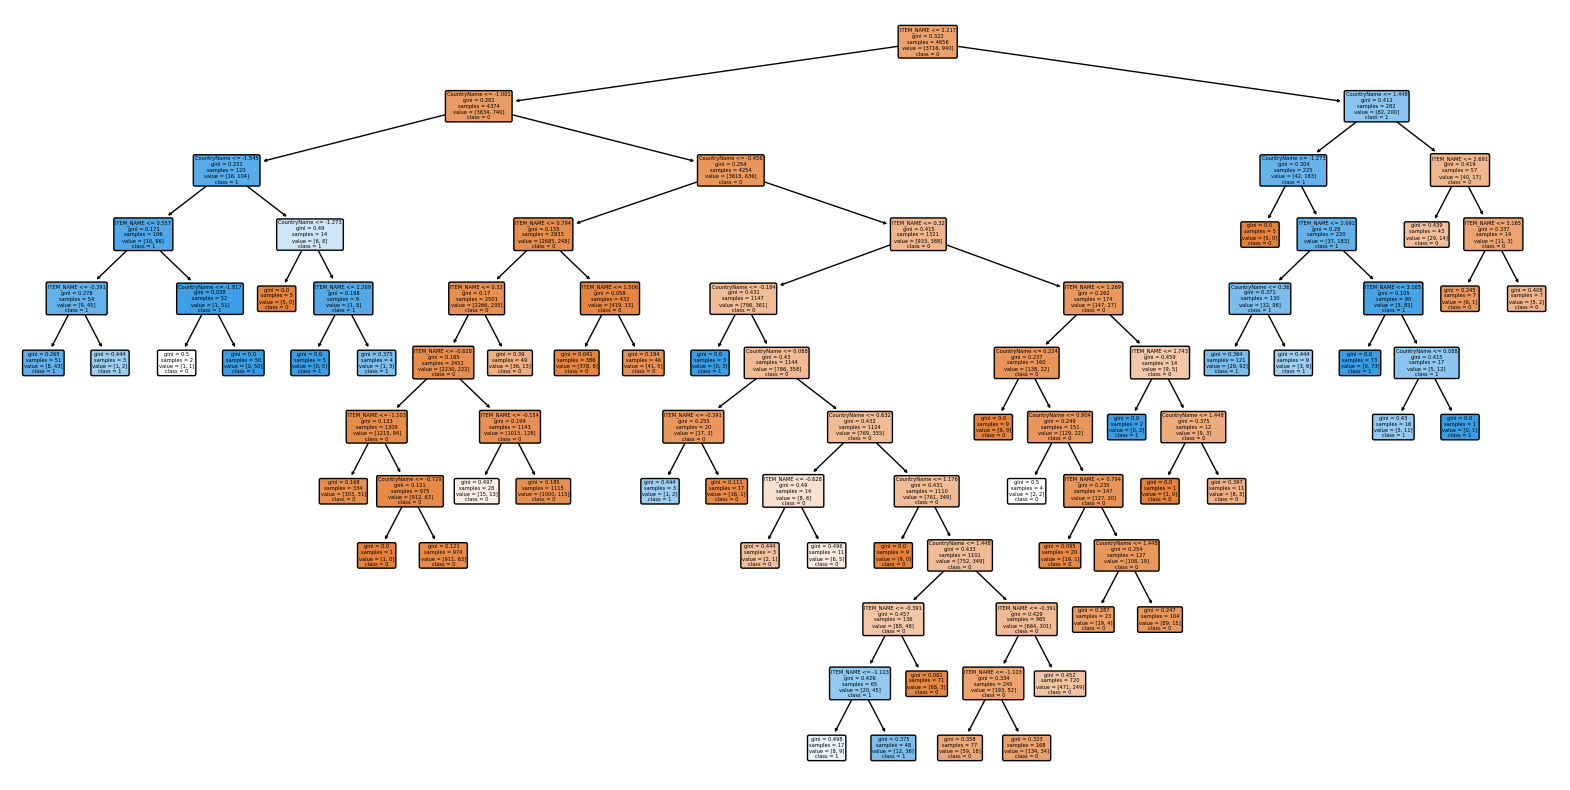

In [60]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
decision_tree_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_tree = decision_tree_classifier.predict(X_test_scaled)

# Evaluate the accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree}")

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_classifier, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()


In [61]:
# Get feature importances from the trained decision tree
feature_importances = decision_tree_classifier.feature_importances_

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importances_df)


       Feature  Importance
0  CountryName    0.520223
1    ITEM_NAME    0.479777


In [ ]:
#country name and item name are most imp features to be kept in mind when predicting conversion rates 

In [ ]:
#company should focus on top customers like USA and UK. Also, top products like hand tufted 

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Assuming "target_variable" is your target column
target_variable = 'Order Conversion'

# Load your dataset (replace 'your_dataset.csv' with your actual dataset)
# DataOnSample = pd.read_csv('your_dataset.csv')

# Extract features and target variable
X = DataOnSample.drop(columns=[target_variable])
y = DataOnSample[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create column transformer with imputation and scaling
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create an SVM classifier
svm_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', SVC(kernel='linear', random_state=42))])

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Evaluate the model
accuracy = svm_classifier.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8908934707903781


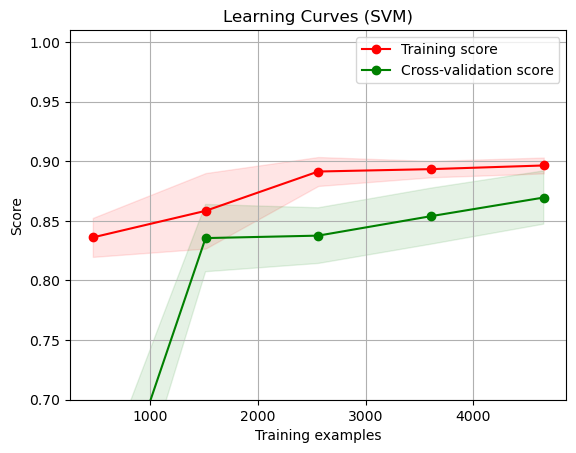

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
title = "Learning Curves (SVM)"
plot_learning_curve(svm_classifier, title, X, y, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

plt.show()


In [ ]:
#curves suggest there is no overfitting 

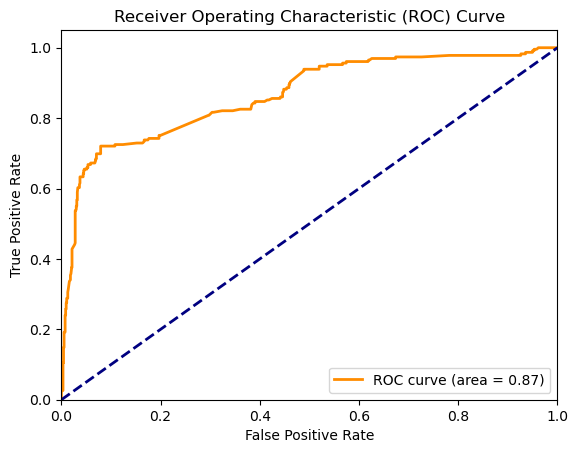

In [65]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming svm_classifier is your trained SVM classifier
# Also, assuming X and y are your features and target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_scores = svm_classifier.decision_function(X_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
